In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
cd Datasets/

/content/drive/My Drive/Datasets


In [ ]:
ls

admission-predict-data.csv  breast-cancer-data.csv
bank-note-auth-data.csv     credit-card-data.csv


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#importing the dataset
df = pd.read_csv("breast-cancer-data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Dealing with missing values and categorical values**

In [ ]:
#to drop the columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
#dealing with categorical data
df['diagnosis'].mask(df['diagnosis'] == 'M', 1 , inplace=True)
df['diagnosis'].mask(df['diagnosis'] == 'B', 0 , inplace=True)

In [ ]:
#to display fist five row of the data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 31)


In [ ]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

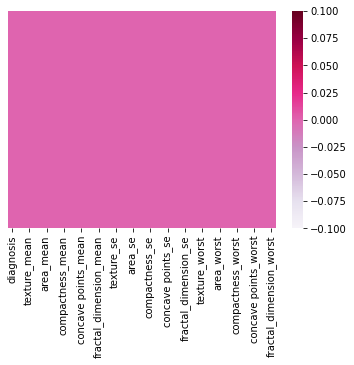

In [ ]:
#heatmap
# no null values
heat_map = sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "PuRd")
plt.show()

# **Countplot**

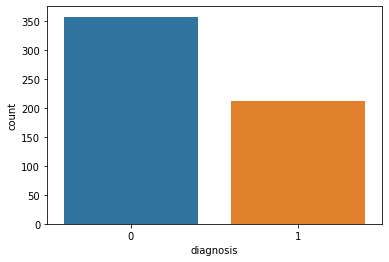

In [ ]:
sns.countplot(data=df, x='diagnosis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **Splitting the dataset train and test set**

In [ ]:
# independent variables
X = df.drop('diagnosis',axis=1)

#dependent variables
Y = df.diagnosis
Y = Y.astype('float64')
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

#creating the object
lb = LabelEncoder()
Y = lb.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.preprocessing import StandardScaler

#creating object
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Creating the model of ANN**

In [ ]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
#import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
#creating model
ann = Sequential()

#first hidden layer
ann.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))

#second hidden layer
ann.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))

#last layer or output layer
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 279       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting the ANN to the training set
model = ann.fit(X_train, y_train, validation_split=0.33, batch_size=100, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 0.7830 - accuracy: 0.5329 - val_loss: 0.7146 - val_accuracy: 0.6159
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7425 - accuracy: 0.5658 - val_loss: 0.6794 - val_accuracy: 0.6490
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7056 - accuracy: 0.6118 - val_loss: 0.6467 - val_accuracy: 0.6623
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6645 - val_loss: 0.6181 - val_accuracy: 0.6954
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6389 - accuracy: 0.6908 - val_loss: 0.5915 - val_accuracy: 0.7086
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6082 - accuracy: 0.7105 - val_loss: 0.5674 - val_accuracy: 0.7351
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5801 - accuracy: 0.7303 - val_loss: 0.5440 - val_accuracy: 0.7483
Epoch 8/100
4/4 [=========

In [ ]:
#now testing for test data
predictions_ann = ann.predict(X_test)
predictions_ann = (predictions_ann>0.5)
predictions_ann

# **Predicting a single observation**

In [ ]:
#new prediction based on given input
new_input = [[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601,0.1189]] #[['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']]
new_output = ann.predict(new_input)
print(new_input, new_output)
if new_output == True:
  print("Malignant Diagnosis")
else:
  print("Benign Diagnosis")

[[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]] [[1.]]
Malignant Diagnosis


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,predictions_ann)
score = accuracy_score(y_test,predictions_ann)
print(cm)
print('score is:',score)

[[74  1]
 [ 1 38]]
score is: 0.9824561403508771


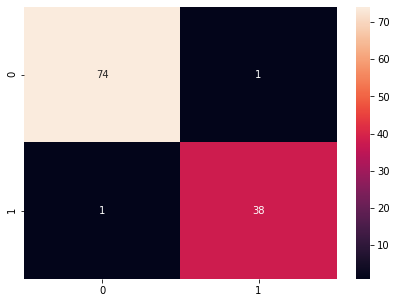

In [ ]:
#creating heatmap of confussion matrix
plt.figure(figsize=[7,5])
sns.heatmap(cm,annot=True)
plt.show()

# **Graph plotting of accuracy and loss**

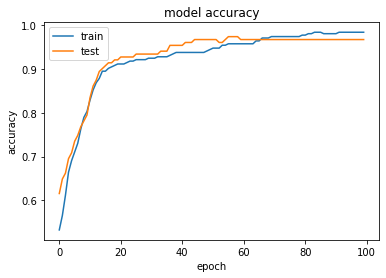

In [ ]:
#summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

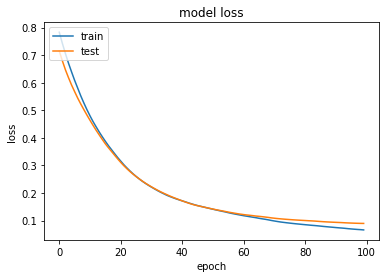

In [ ]:
#summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()